<a href="https://colab.research.google.com/github/TAbdullah-T/T5-SAD/blob/main/ML/Project/Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [4]:
df = pd.read_csv('/content/RTA_Dataset.csv')


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [15]:
df.drop_duplicates(inplace=True)

In [33]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,2024-08-01 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,2024-08-01 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,2024-08-01 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2024-08-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2024-08-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,na,na,na,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [22]:
df.describe()

,Time,Number_of_vehicles_involved,Number_of_casualties
count,12316,12316.000000,12316.000000
mean,2024-08-01 14:17:50.768106496,2.040679,1.548149
min,2024-08-01 00:01:00,1.000000,1.000000
25%,2024-08-01 10:31:00,2.000000,1.000000
50%,2024-08-01 15:10:00,2.000000,1.000000
75%,2024-08-01 18:10:00,2.000000,2.000000
max,2024-08-01 23:59:00,7.000000,8.000000
std,NaN,0.688790,1.007179


In [24]:
df['Pedestrian_movement'].value_counts()

,count
Pedestrian_movement,
Not a Pedestrian,11390
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,337
Unknown or other,293
Crossing from driver's nearside,140
Crossing from offside - masked by parked or statioNot a Pedestrianry vehicle,72
"In carriageway, statioNot a Pedestrianry - not crossing (standing or playing)",46
"Walking along in carriageway, back to traffic",18
"In carriageway, statioNot a Pedestrianry - not crossing (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle",13
"Walking along in carriageway, facing traffic",7


Form the above table we can see that the majorty of the accedident does not envolve pedestrain this could be helpfull in romving this column

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [18]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [60]:
df['Accident_severity'].value_counts()

,count
Accident_severity,
Slight Injury,10415
Serious Injury,1743
Fatal injury,158


## For the missing objective Data we will replace it by the mode


- Educational_level
- Vehicle_driver_relation	579
- Driving_experience	829
- Type_of_vehicle	950
- Owner_of_vehicle	482
- Service_year_of_vehicle	3928
- Defect_of_vehicle	4427
- Area_accident_occured	239
- Lanes_or_Medians	385
- Road_allignment	142
- Types_of_Junction	887
- Road_surface_type	172
- Type_of_collision	155
- Vehicle_movement	308
- Work_of_casuality	3198
- Fitness_of_casuality

In [ ]:
df['Educational_level'].fillna(df['Educational_level'].mode()[0], inplace=True)
df['Vehicle_driver_relation'].fillna(df['Vehicle_driver_relation'].mode()[0], inplace=True)
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0], inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)
df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0], inplace=True)
df['Service_year_of_vehicle'].fillna(df['Service_year_of_vehicle'].mode()[0], inplace=True)
df['Defect_of_vehicle'].fillna(df['Defect_of_vehicle'].mode()[0], inplace=True)
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0], inplace=True)
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0], inplace=True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace=True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0], inplace=True)
df['Road_surface_type'].fillna(df['Road_surface_type'].mode()[0], inplace=True)
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0], inplace=True)
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0], inplace=True)
df['Work_of_casuality'].fillna(df['Work_of_casuality'].mode()[0], inplace=True)
df['Fitness_of_casuality'].fillna(df['Fitness_of_casuality'].mode()[0], inplace=True)

In [26]:
df['Sex_of_casualty'].value_counts()

,count
Sex_of_casualty,
Male,5253
na,4443
Female,2620


In [ ]:
df['Sex_of_casualty'].fillna(df['Sex_of_casualty'].mode()[0], inplace=True)

In [29]:
df['Age_band_of_casualty'].value_counts()

,count
Age_band_of_casualty,
na,4443
18-30,3145
31-50,2455
Under 18,1035
Over 51,994
5,244


The mode of this column is na (Unknow) I can't fill it with the mode it will be unrealistic

In [30]:
df['Age_band_of_casualty'].replace('na',"Unknown")

,Age_band_of_casualty
0,Unknown
1,Unknown
2,31-50
3,18-30
4,Unknown
5,31-50
6,18-30
7,Unknown
8,Under 18
9,18-30


In [31]:
df['Casualty_severity'].value_counts()

,count
Casualty_severity,
3,7076
na,4443
2,771
1,26


In [32]:
df['Casualty_severity'].replace('na',df['Casualty_severity'].mode()[0], inplace=True)

Chaning the type of the following columns

- Time


In [ ]:
df['Time'] = pd.to_datetime(df['Time'])

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

<Axes: ylabel='Road_surface_type'>

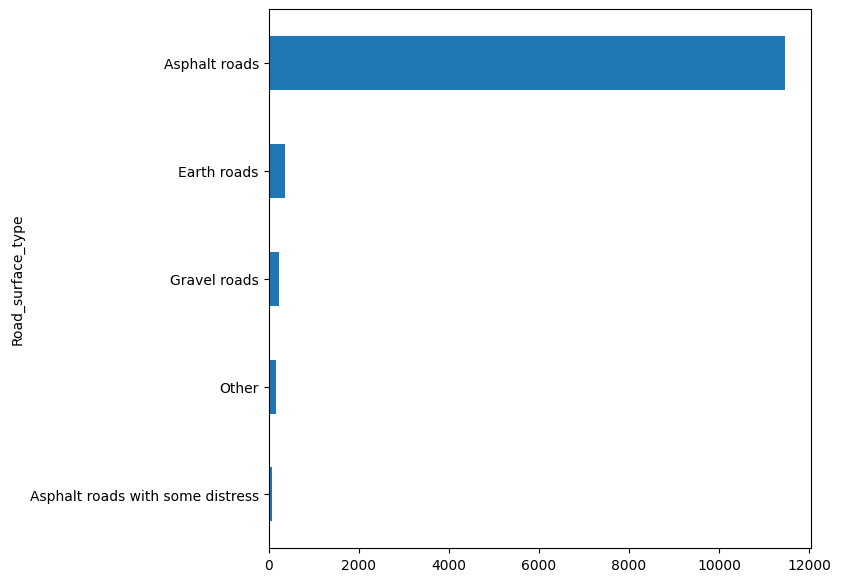

In [174]:

df['Road_surface_type'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))

<Axes: ylabel='Types_of_Junction'>

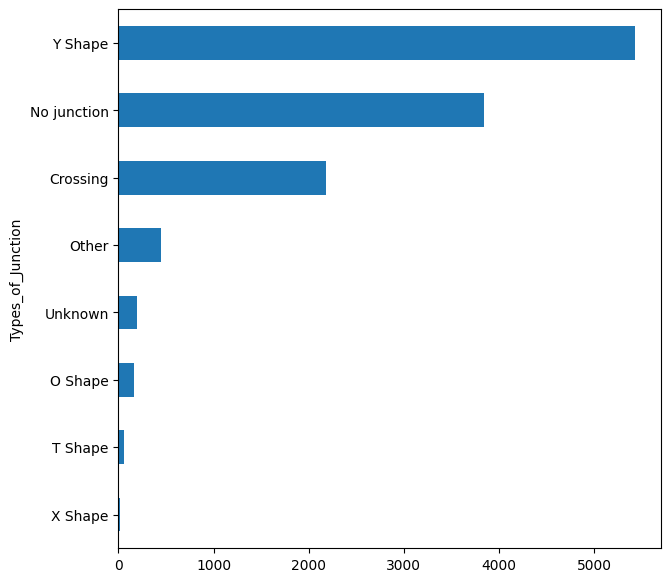

In [173]:

df['Types_of_Junction'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))

<Axes: ylabel='Road_allignment'>

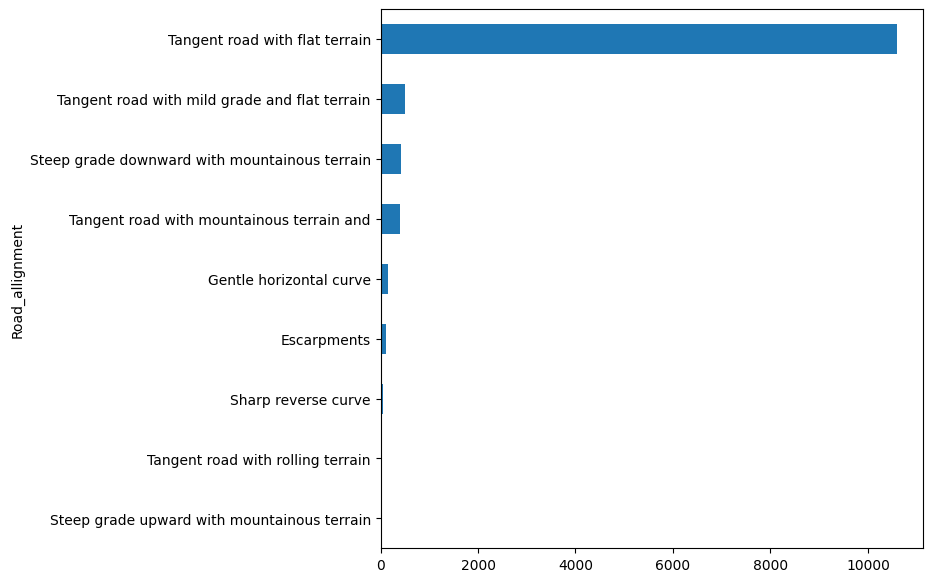

In [172]:
df['Road_allignment'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))

<Axes: ylabel='Lanes_or_Medians'>

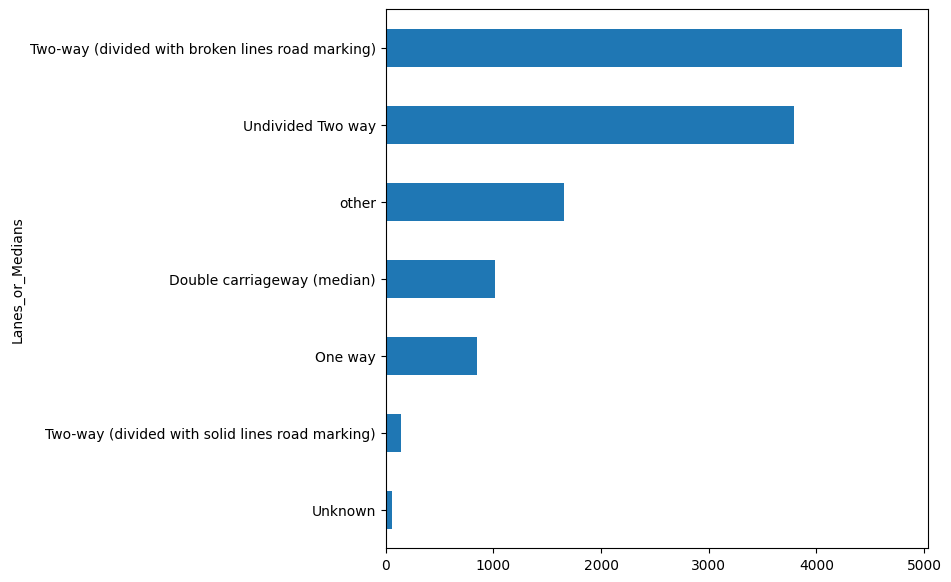

In [171]:
df['Lanes_or_Medians'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))

The diffrent between Two-way divided with broken lines and solid lines is houge

I know it is expensive to build Solid lines but this could invrease the saifte of the road

<Axes: ylabel='Area_accident_occured'>

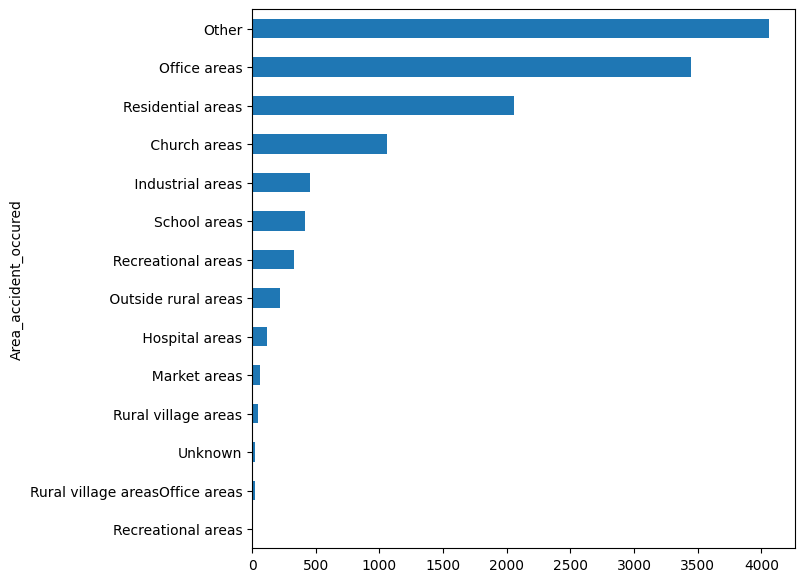

In [169]:
df['Area_accident_occured'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))

<Axes: ylabel='Defect_of_vehicle'>

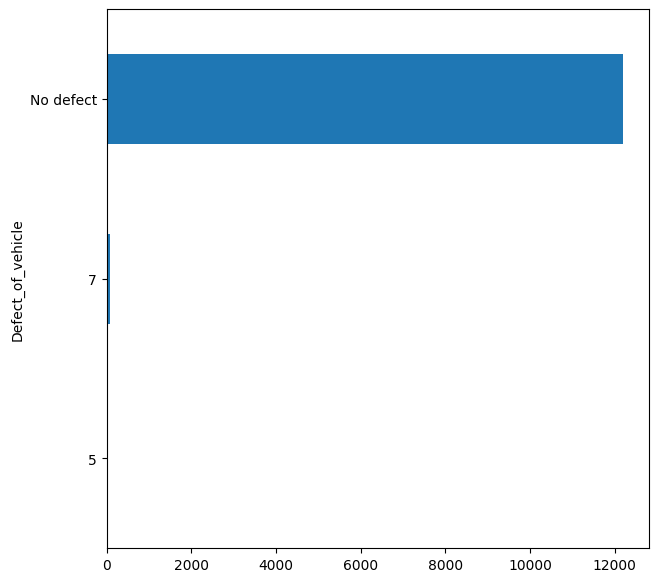

In [168]:
df['Defect_of_vehicle'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))

almost all of the values No defect this make it usless and only adding complixite to our feature

<Axes: ylabel='Service_year_of_vehicle'>

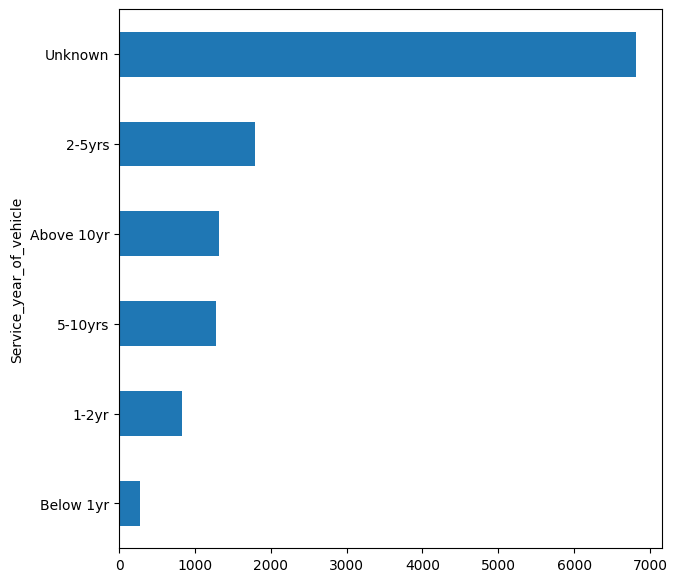

In [167]:
df['Service_year_of_vehicle'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))

Most of the column values are Unknown this makes it usless to our model and does not add a value it could add a nois that why we will drop it. I cant fill mode values

<Axes: ylabel='Owner_of_vehicle'>

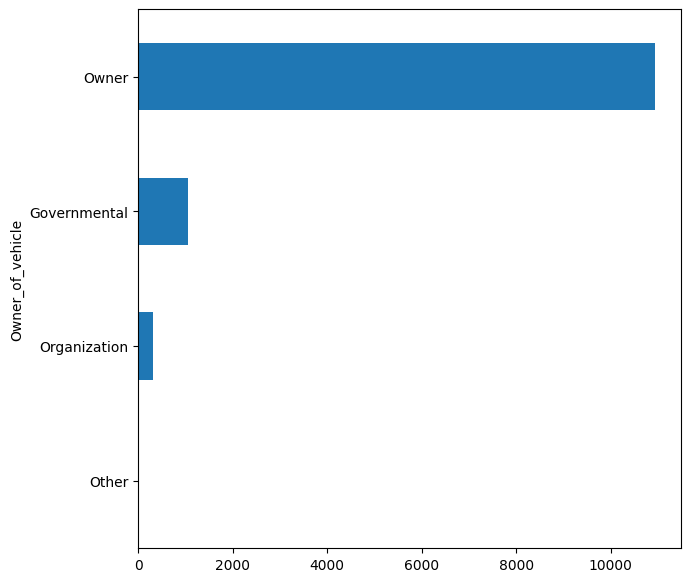

In [166]:
df['Owner_of_vehicle'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))

Make sence beacuse most of the cars are privitly Owned


<Axes: ylabel='Vehicle_driver_relation'>

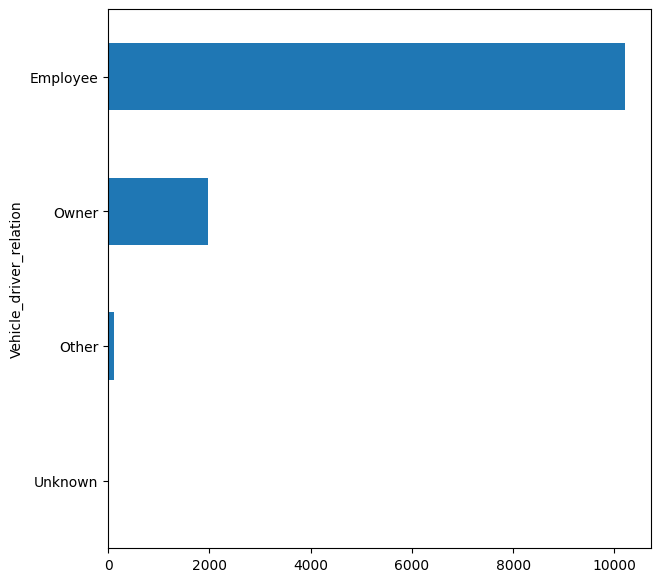

In [108]:
df['Vehicle_driver_relation'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))

<Axes: ylabel='Driving_experience'>

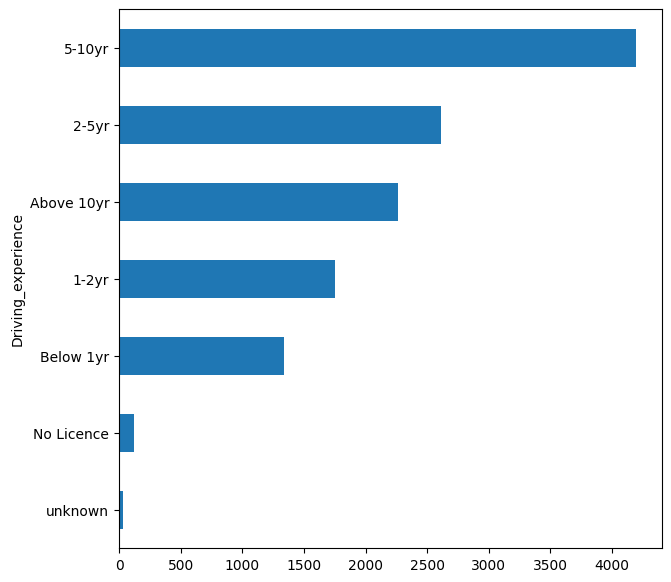

In [107]:
df['Driving_experience'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))


People with low experince tend to be more carful when driving cars that make them make lower accidents

For the No Licence their low number should not amply that they do not make accident but it could be because they are few

<Axes: ylabel='Sex_of_driver'>

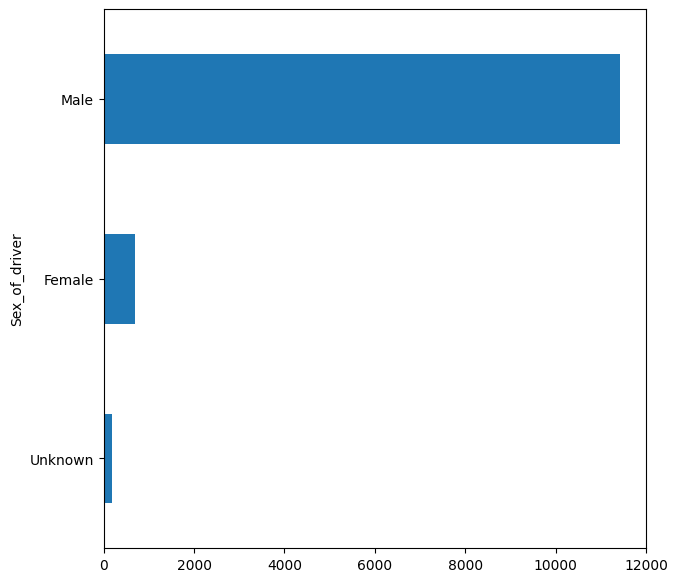

In [46]:
df['Sex_of_driver'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))


We Will drop this coulmns
it will make our model baise for male (the data for female is not enough)

In [ ]:
#df['Sex_of_driver'].drop(inplace = True)

<Axes: ylabel='Age_band_of_driver'>

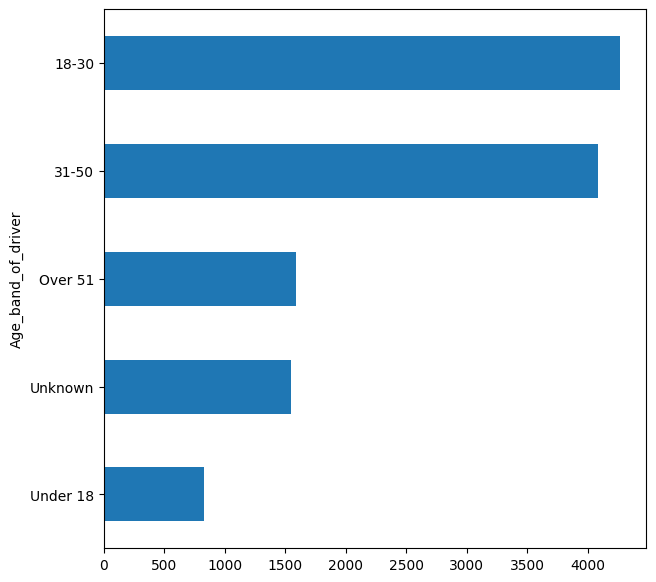

In [47]:
df['Age_band_of_driver'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))


The reseson for low accedient in under 18 is because they are not allowed to drive

the behaviour of the 31-50 and 18-30 is not changing (this is a problem people of older age tend to be more carful but not here)

<Axes: ylabel='Day_of_week'>

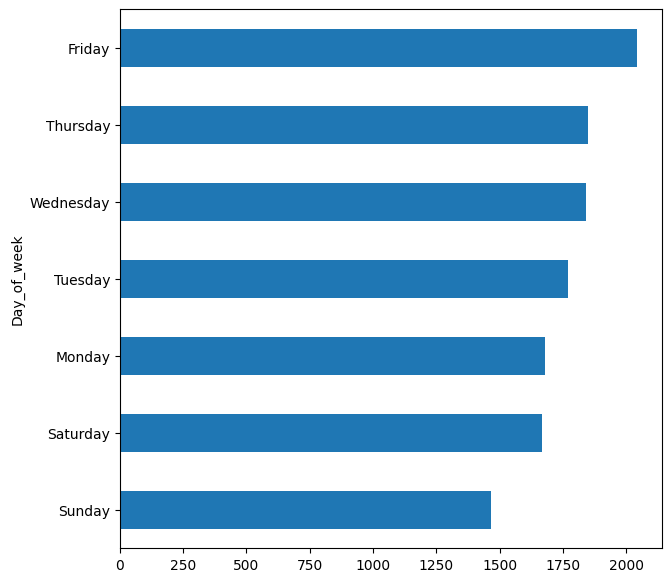

In [48]:
df['Day_of_week'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))


It would make more sence if the accident count in the working days is more than the weekend but this is not the case I think that data collected from places where tend to be more crowded in the off days (intertament)

<Axes: ylabel='Educational_level'>

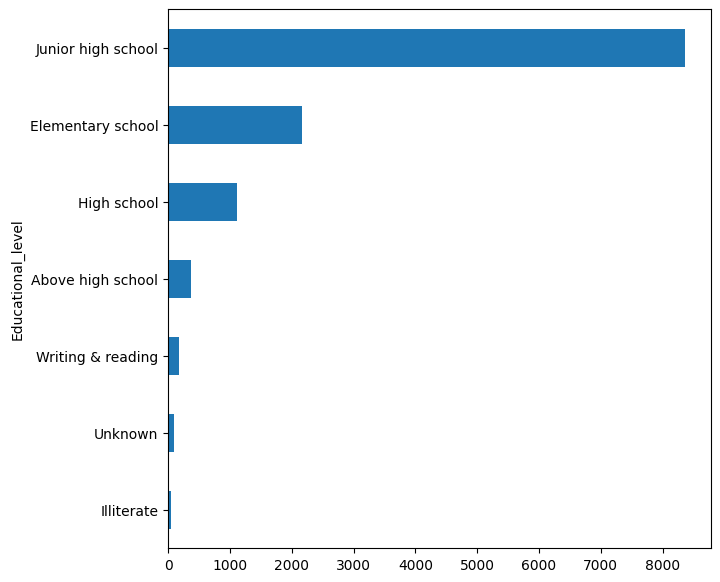

In [49]:
df['Educational_level'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))

we assume the value (writing and reading) are people who know how to read and write but did not recive any education
here the data does not make sence how Junior high school and Elementray school able to drive

but we will asume they are old but this is there education lvl ( not in KSA)

<Axes: ylabel='Type_of_vehicle'>

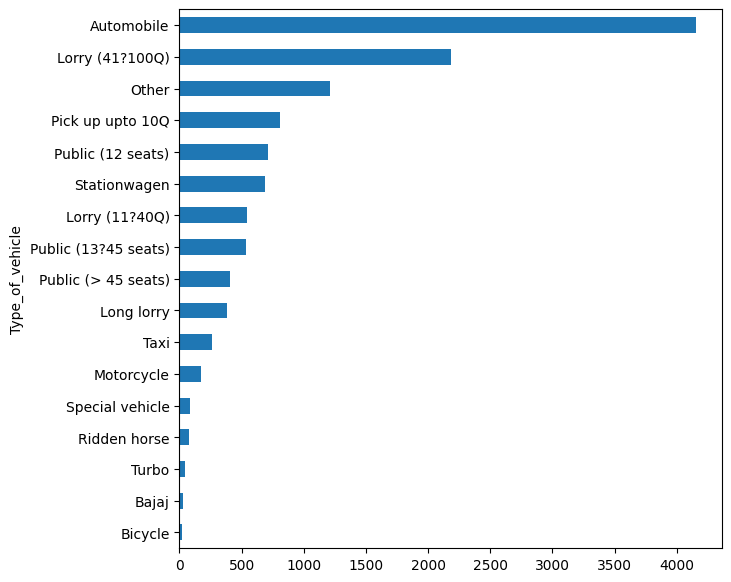

In [50]:
df['Type_of_vehicle'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))


Make sence because the majorite of the cars are Automobile cars

we Do not have large number of Bicycle that why it is low

<Axes: ylabel='Sex_of_casualty'>

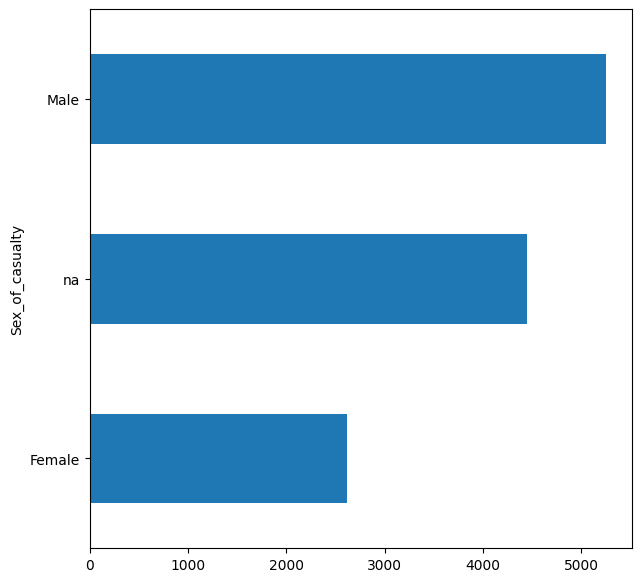

In [51]:
df['Sex_of_casualty'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))

This column does not affect the Accident_severity that why we will drop it

<Axes: ylabel='Type_of_vehicle'>

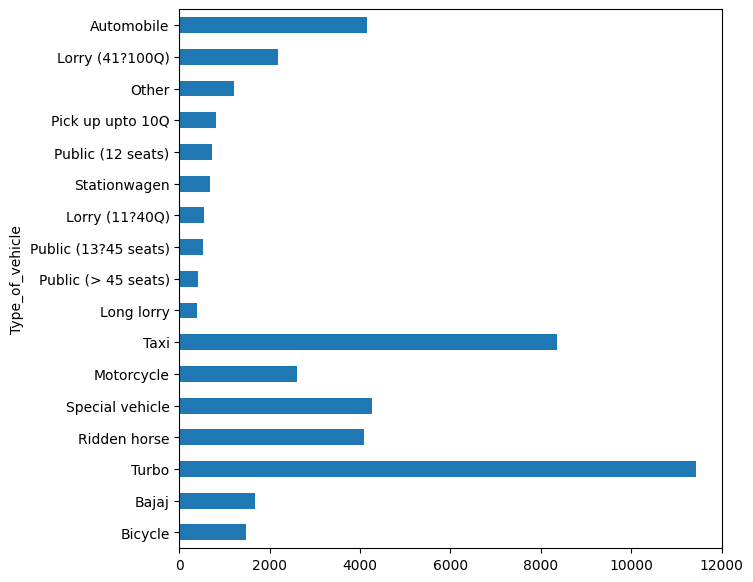

In [45]:
df['Driving_experience'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))

<Axes: >

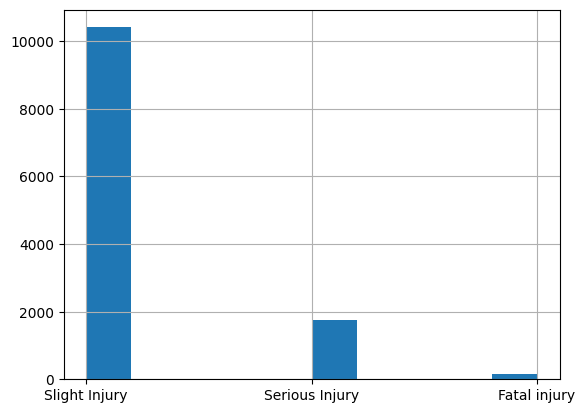

In [102]:
df['Accident_severity'].hist()

The majorite class is Slight injury so most of the accident does not need ambulance

<Axes: >

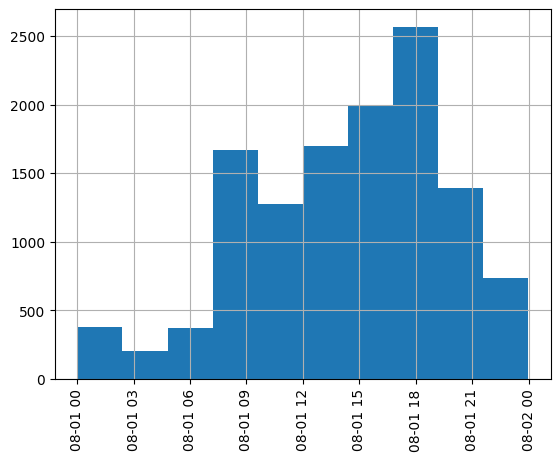

In [165]:
df['Time'].hist(xrot=90)

<Axes: xlabel='Day_of_week'>

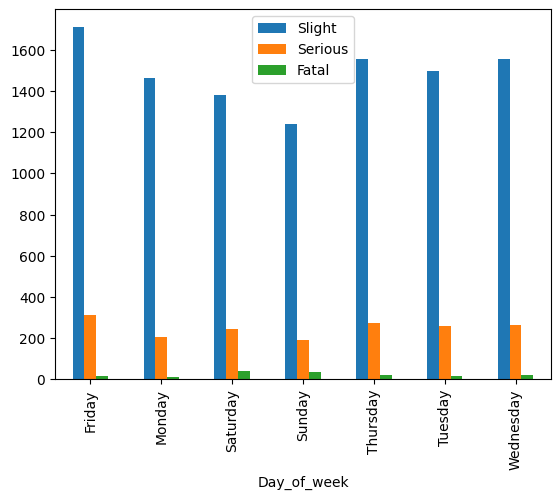

In [145]:
df1 = df.loc[:,['Accident_severity','Day_of_week']]

df1['Slight'] = df['Accident_severity'] == 'Slight Injury'
df1['Serious'] = df['Accident_severity'] == 'Serious Injury'
df1['Fatal']  = df['Accident_severity'] == 'Fatal injury'

df1.head()

df2 = df1.groupby(['Day_of_week']).agg({'Slight':'sum',
                                        'Serious':'sum',
                                        'Fatal':'sum'})
df2.plot(kind='bar')

In [146]:
df3 = df.groupby(['Day_of_week','Time']).agg({'Accident_severity':'count'})
df3

Accident_severity
Day_of_week Time                                  
Friday      2024-08-01 00:01:00                  2
            2024-08-01 00:03:00                  2
            2024-08-01 00:08:00                  3
            2024-08-01 00:15:00                  1
            2024-08-01 00:20:00                  3
...                                            ...
Wednesday   2024-08-01 23:05:00                  1
            2024-08-01 23:25:00                  8
            2024-08-01 23:35:00                  8
            2024-08-01 23:50:00                  1
            2024-08-01 23:53:00                  1

[2755 rows x 1 columns]

In [41]:
df2 = df.groupby("Educational_level").agg({'Accident_severity':'count'} , inplace = True)
print(df2)

                    Accident_severity
Educational_level                    
Above high school                 362
Elementary school                2163
High school                      1110
Illiterate                         45
Junior high school               8360
Unknown                           100
Writing & reading                 176


## We will do our pipeLine here

these are the coulmns for One-hot Encodeing



In [175]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


num_pipe = make_pipeline(StandardScaler())

cat_pipe_Ordinal = make_pipeline(OrdinalEncoder())

cat_pipe_one = make_pipeline(OneHotEncoder())

#cat_pipe_Label = make_pipeline(LabelEncoder())

preproce_pipe = ColumnTransformer([("num", num_pipe, ['Number_of_vehicles_involved', 'Number_of_casualties']),
                                   ("cat_One", cat_pipe_one, ['Day_of_week','Vehicle_driver_relation',
'Type_of_vehicle',
'Owner_of_vehicle',
'Area_accident_occured',
'Lanes_or_Medians',
'Road_allignment',
'Types_of_Junction',
'Road_surface_type',
'Road_surface_conditions',
'Weather_conditions',
'Type_of_collision',
'Vehicle_movement',
'Casualty_class',
'Age_band_of_casualty',
'Light_conditions','Casualty_severity','Work_of_casuality','Pedestrian_movement',
'Cause_of_accident']),
                                   ("cat_Leab",cat_pipe_Ordinal , ['Age_band_of_driver','Educational_level',
'Driving_experience']),
                                    ("Droped", 'drop', ['Defect_of_vehicle','Service_year_of_vehicle',
                                                        'Sex_of_casualty','Fitness_of_casuality',
                                                        'Sex_of_driver'])
                                  ])


Spliting the data set

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [77]:
df['Accident_severity'].value_counts()

,count
Accident_severity,
Slight Injury,10415
Serious Injury,1743
Fatal injury,158


We need to do up sampling to the column Accident_severity

In [228]:
# up sample the model
from sklearn.utils import resample

df_majority = df[df['Accident_severity'] == 'Slight Injury']
df_minority1 = df[df['Accident_severity'] == ('Serious Injury')]
df_minority2 = df[df['Accident_severity'] == ('Fatal injury')]

df_minority_upsampled = resample(df_minority1, replace=True, n_samples=int(len(df_majority)/1.2), random_state=42)
df_minority_upsampled2 = resample(df_minority2, replace=True, n_samples=int(len(df_majority)/1.5), random_state=42)

In [229]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled = pd.concat([df_upsampled, df_minority_upsampled2])

In [230]:
df_upsampled.value_counts('Accident_severity')

,count
Accident_severity,
Slight Injury,10415
Serious Injury,8679
Fatal injury,6943


In [231]:
from sklearn.model_selection import train_test_split

X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']
y = y.map({'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2})

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
x_train_pro = preproce_pipe.fit_transform(x_train)
x_test_pro  = preproce_pipe.transform(x_test)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score

log_reg = LogisticRegression()
log_reg.fit(x_train_pro, y_train)


y_pred_train_reg = log_reg.predict(x_train_pro)
accuracy_train_reg = accuracy_score(y_train, y_pred_train_reg)
print(f"Accuracy for the Training: {accuracy_train_reg}")

y_pred_test_reg = log_reg.predict(x_test_pro)

print(f"Accuracy for the testing: {accuracy_score(y_test, y_pred_test_reg)}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_reg))

print('Recall:', recall_score(y_test, y_pred_test_reg, average='weighted'))
print('Precision:', precision_score(y_test, y_pred_test_reg, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred_test_reg, average='weighted'))

Accuracy for the Training: 0.8476451481932602
Accuracy for the testing: 0.8372564935064936
Confusion Matrix:
[[2063    0    1]
 [ 363    0    0]
 [  37    0    0]]
Recall: 0.8372564935064936
Precision: 0.701622981160131
F1 Score: 0.7634625149535688


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(min_samples_split=10, max_depth=10)
dTree.fit(x_train_pro, y_train)


y_pred_train_tree = dTree.predict(x_train_pro)
accuracy_train = accuracy_score(y_train, y_pred_train_tree)
print(f"Accuracy for the Training: {accuracy_train}")


# predictions on the test set
y_pred_test_tree = dTree.predict(x_test_pro)

print(f"Accuracy for the testing: {accuracy_score(y_test, y_pred_test_tree)}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_tree))

print('Recall:', recall_score(y_test, y_pred_test_tree, average='weighted'))
print('Precision:', precision_score(y_test, y_pred_test_tree, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred_test_tree, average='weighted'))

#### Support Vector Machine (SVM)

In [235]:
import sklearn.svm as SVM

svm_model = SVM.SVC(kernel='linear', C=1.0,random_state=42)

svm_model.fit(x_train_pro, y_train)

# Accuracy of the training
y_pred_train_SVM = svm_model.predict(x_train_pro)
print(f"Accuracy for the Training: {accuracy_score(y_train, y_pred_train_SVM)}")

# predictions on the test set
y_pred_test_SVM = svm_model.predict(x_test_pro)
print(f"Accuracy for the testing: {accuracy_score(y_test, y_pred_test_SVM)}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_SVM))

print('Recall:', recall_score(y_test, y_pred_test_SVM, average='weighted'))
print('Precision:', precision_score(y_test, y_pred_test_SVM, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred_test_SVM, average='weighted'))

Accuracy for the Training: 0.8477466504263094
Accuracy for the testing: 0.8376623376623377
Confusion Matrix:
[[2064    0    0]
 [ 363    0    0]
 [  37    0    0]]
Recall: 0.8376623376623377
Precision: 0.7016781919379322
F1 Score: 0.7636638979395164


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### K-Neighbors Classifier

In [189]:
import sklearn.neighbors as KNN

KNN_model = KNN.KNeighborsClassifier(n_neighbors=5)

KNN_model.fit(x_train_pro, y_train)

# Accuracy of the training
y_pred_train = KNN_model.predict(x_train_pro)

print(f"Accuracy for the Training: {accuracy_score(y_train, y_pred_train)}")

# predictions on the test set
y_pred_test_KNN = KNN_model.predict(x_test_pro)
print(f"Accuracy for the testing: {accuracy_score(y_test, y_pred_test_KNN)}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_KNN))

print('Recall:', recall_score(y_test, y_pred_test_KNN, average='weighted'))
print('Precision:', precision_score(y_test, y_pred_test_KNN, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred_test_KNN, average='weighted'))

Accuracy for the Training: 0.8614494518879415
Accuracy for the testing: 0.8271103896103896
Confusion Matrix:
[[2017   46    1]
 [ 343   19    1]
 [  34    1    2]]
Recall: 0.8271103896103896
Precision: 0.7556685951892719
F1 Score: 0.7725067930952938


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

Already done above


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.


>

- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.


- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.


- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.


- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?


- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: